# Understanding Simple Linear Regression

## Introduction

#### Goal:
This analysis will demonstrate how to quantify the relationship between two variables using a Linear Regression model.

<span style='color:Blue'> Simple linear regression </span>  *is a technique that can be used to understand the relationship between a single independent variable and a single dependent variable. Linear regression quantifies the relationship between independent and dependent variables.*

#### Documentation:
Ice Cream Revenue dataset will be used for the analysis. 
It is public and available in Kaggle at <a href= "https://www.kaggle.com/vinicius150987/ice-cream-revenue" target="_blank">this link</a>. 

#### Data Dictionary: 
- Temperature: A degree of hotness or coldness measured in Celsius. 
- Revenue: Income generated from ice-creams sales.

### Understanding Data

In [70]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

print('Load Libraries - Done')
print ('_'*127)

Load Libraries - Done
_______________________________________________________________________________________________________________________________


In [2]:
# uploading the dataset
df = pd.read_csv('IceCreamData.csv')
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


Above is the visual look of the dataset.
___

In [3]:
# checking the dataset dimension
print(f'There are {df.shape[0]} observations/rows and {df.shape[1]} variables/columns in the dataset')
print ('_'*127)

There are 500 observations/rows and 2 variables/columns in the dataset
_______________________________________________________________________________________________________________________________


In [4]:
# checking variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


As per the above output, the dataset has two numeric variables.
___

In [5]:
# checking missing values in %
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, (missing*100)))

Temperature - 0.0%
Revenue - 0.0%


According to the above output, there is no missing data in the dataset.
___

In [6]:
# checking duplicate data
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

According to the above output, there is no duplicate data in the dataset.
___

In [71]:
# checking duplicate data in 'Temperature' variable/column
df.duplicated(subset=['Temperature']).sum()

0

The above operation is performed to check the subset of the dataset for duplicates. None was found.
***

In [8]:
# evaluating summary statistics
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
Temperature,500.0,22.232225,8.096388,0.0,17.122258,22.392791,27.740674,45.0
Revenue,500.0,521.570777,175.404751,10.0,405.558681,529.368565,642.257922,1000.0


The standard deviation of 'Revenue' is 175,4 currency units which is far from zero, meaning that there is variability in the 'Revenue' variable. Other than that, the above output does not indicate any other potential errors in the dataset.
___

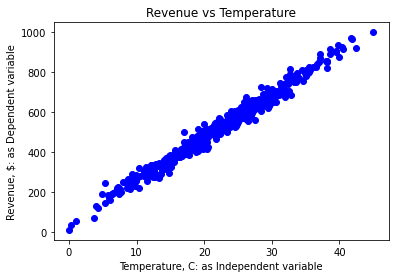

In [9]:
# the dataset visualization 
plt.scatter(df.Temperature, df.Revenue, color='blue')
plt.title('Revenue vs Temperature')
plt.xlabel('Temperature, C: as Independent variable')
plt.ylabel('Revenue, $: as Dependent variable')
plt.show()

The above chart is presented to visualize the dataset in order to gain an understanding of it. First, we need to ensure that the relationship between 'Revenue' vs 'Temperature' is approximately linear, since that is an underlying assumption of the simple linear regression.
From the above plot, we can see that the variables appear to have linear relationship as the 'Temperature' increases, the 'Revenue' tends to increase as well linearly.

                                                     ***
                                                     
<span style='color:Blue'> There are four assumptions of the linear regression:  </span> *1) Linear relationship; 2) Independence; 3) Homoscedasticity; 4) Normality.*

<span style='color:Blue'> Assumption # 1: Linear Relationship.  </span>
*The first assumption of the linear regression means that there should be a linear relationship between the independent and dependent variables.*

*If the assumption is violated, there are couple options to be applied:*
   *1) A nonlinear transformation to the independent and/or dependent variable. For example, including the log, the square root, or the reciprocal of variables.*
   *2) Include another independent variable to the analysis.*

**The remaining assumptions will be discussed below.**
___

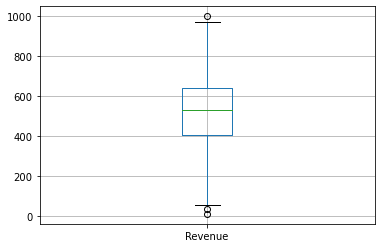

In [32]:
# boxplot to visualize the distribution

df.boxplot(column=['Revenue'])

From the above plot, we can see that there are more than one outlier present in the dataset. They should be clarified if they’re not a result of data entry error, however, we are not able to clarify it since this is a public data, and we cannot reach a subject-matter expert. So, I will run the analysis in three scenarios: 1) as it is; 2) let's assume that the outliers turn out to be a result of a data entry error, so I will assign a new value median to the dataset; 3) let's remove outliers and check if there is a significant impact afterwards.
___

### Performing Simple Linear Regression - option #01 
*As it is option*

In [11]:
# assigning dependent variable
y = df['Revenue']

# assigning independent variable
x = df[['Temperature']]

# adding constant to independent variable
x = sm.add_constant(x)

# fitting linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.404e+04
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:04:40   Log-Likelihood:                -2318.1
No. Observations:                 500   AIC:                             4640.
Df Residuals:                     498   BIC:                             4649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.8313      3.272     13.703      

___
By using the linear regression, we can find the line that best 'fits' to the dataset. This line is called **the least squares regression line**. The line helps to understand the relationships between two variables. 

The formula for the least squares regression line:

**ŷ = b0 + b1x** (**ŷ** - value of the dependent variable; **b0** - y-intercept; **b1** - regression coefficient; **x** - value of the independent variable).

                                                        ***

From the above output, we can see that the fitted regression equation is:

**Revenue = 44.8313 + 21.4436*(Temperature)**

This means that each additional increase of the 'Temperature' causes an average increase in the 'Revenue' of 21.4436 currency unit. And the intercept value of 44.8313 indicates the average expected 'Revenue' if the 'Temperature' is 0 degree C.

                                                        ***
                                                     
Interpretation of the rest of the model summary:

- **P>|t|** - it's a value associated with the model coefficients. As per the above summary, the p-value for the 'Temperature' is 0.000, and it's less than .05 (5%), so we can conclude that there is a statistically significant association between the 'Temperature' and the 'Revenue'.

- **R-squared** - it shows the percentage of the variation of dependent variable (Revenue) that can be explained by independent variable (Temperature). The larger the R-squared value of the model, the better the independent variable can forecast the value of the dependent variable. In our case, 98% of the variation in the 'Revenue' can be explained by the 'Temperature' increase/decrease.

- **F-statistic & p-value** - The F-statistic (2.404e+04) and the corresponding p-value (0.00) indicates the significance of the regression model in general, if the independent variable (Temperature) in the model is valuable for explaining the shift in the dependent variable (Revenue). Since the p-value in this example is less than .05 (5%), it means that our model is a statistically significant and the 'Temperature' is believed to be valuable to predict the variation in the 'Revenue'.
___

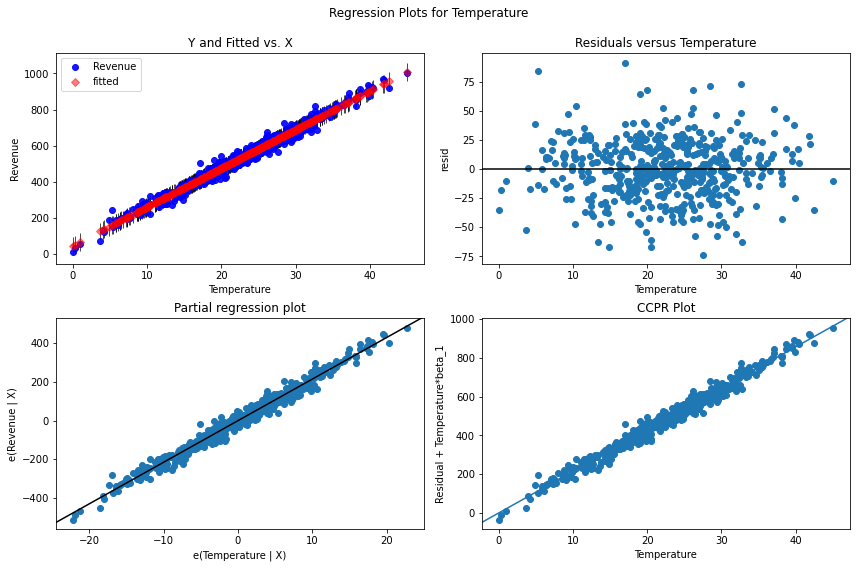

In [12]:
# residual vs. fitted values plot

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Temperature', fig=fig)

The final step of our model is to visualize residual vs. fitted values plot. This plot is needed to identify if the residuals of the regression model are approximately normally distributed and are homoscedastic. If the assumptions are violated, then the results of the model can be unreliable.

The plot in the top right corner is the residual vs. fitted plot. The x-axis refers to the actual values for the independent variable points, while the y-axis represents the residual for those values. Since the residuals seem to be randomly scattered around zero, this is an indication that heteroscedasticity is not present.

There are other ways to test the heteroscedasticity. One of them is the Breusch-Pagan test, and it will be demonstrated below.

                                                        ***
                                                    
<span style='color:Blue'> Assumption # 2: Homoscedasticity.  </span>
*The second assumption means that the residuals have constant variance at every level of an independent variable. When homoscedasticity is not met, the residuals are heteroscedastic. If there is a heteroscedasticity in a regression analysis, the results of the analysis are not reliable.*

*If the Homoscedasticity assumption is violated, there are couple options that can be applied:*
   *1) Change the dependent variable.* 
   *2) Redefine the dependent variable.*
   *3) Apply weighted regression.*

<span style='color:Blue'> Assumption # 3: Normality.  </span>
*The third assumption of the linear regression means that the residuals should be normally distributed.*

*If the normality assumption is violated, there are couple options that can be applied:*
   *1) A nonlinear transformation to the independent and/or dependent variable. For example, including the log, the square root, or the reciprocal of variables.*
   *2) Verify if outliers have a significant impact on the distribution.*
   

<span style='color:Blue'> Assumption # 4: Independence.  </span>
*The fourth assumption of the linear regression is that the residuals are independent, and this assumption is mostly relevant when working with time series data, which is why it won't be tested in this analysis.*
___


In [14]:
# the Breusch-Pagan test for Homoscedasticity
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 0.014636383003807651),
 ('p-value', 0.9037061478129139),
 ('f-value', 0.01457826421792246),
 ('f p-value', 0.9039452910313822)]

The Breusch-Pagan test is another way to find out if the dataset is homoscedastic. 
In our example, the Lagrange multiplier statistic for the test is 0.015 and the corresponding p-value is 0.904. Because the p-value is not less than 0.05 (5%), it's failed to reject the null hypothesis (The null hypothesis (H0): Homoscedasticity is present). So, we can conclude that there is no sufficient evidence to say that the dataset has heteroscedasticity in the regression model. It can be assumed that the homoscedasticity is met.
___

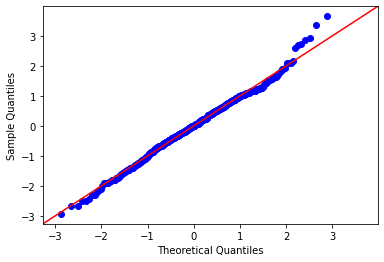

In [15]:
# Q-Q plot to test Normality of the distribution

# assign residuals
residuals = model.resid

#create Q-Q plot
fig = sm.qqplot(residuals, fit=True, line="45")
plt.show()

The above plot is used to clarify if the residuals follow a normal distribution. Since the data values in the Q-Q plot fall along a nearly direct line at a 45-degree angle, then we can conclude that the data is normally distributed.
There is a bit stray of the residuals from the 45-degree line, however, it's not reasonable to cause serious concern. It can be assumed that the normality is met.

                                                        ***
                                                        
Since all the assumptions are met, we can conclude that the results of this regression model is reliable.
___

### Performing Simple Linear Regression - option #02
*In this model, we assume that the outliers turn out to be a result of a data entry error, so we will assign a new value - median to the outliers.*

In [50]:
# creating copy of the dataset for the second model/option
df2 = df.copy()

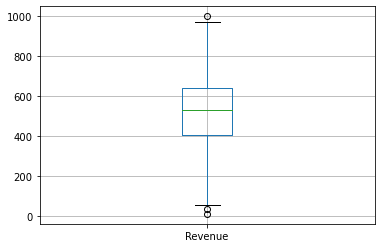

In [51]:
# identifying outliers by boxplot
df2.boxplot(column=['Revenue'])

The above boxplot shows that the 'Revenue' contains outliers. Regarding the 'Temperature', outliers won't be identified as according to the summary statistics, its min value is 0 degree C, while max value is 45 degree C what is acceptable.
___

In [33]:
# accessing to median values
print(df2['Revenue'].quantile(0.50)) 
print(df2['Revenue'].quantile(0.95)) 

529.36856475
809.677337025


The first line of the above code shows the 50th percentile value, or the median, which comes out to be 529.37. The second line shows the 95th percentile value, which comes out to be around 809.
___

In [42]:
# replacing outliers with median values
df2['Revenue'] = np.where(df2['Revenue'] > 809, 529, df2['Revenue'])
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,500.0,22.232225,8.096388,0.0,17.122258,22.392791,27.740674,45.000000
Revenue,500.0,502.193592,152.390634,10.0,405.558681,528.690208,613.396674,807.541287


The above code replaces all the values of the 'Revenue' variable, which are greater than the 95th percentile, with the median value.

If we compare the above output of the summary statistics with its previous version, we can see the difference between the first and the second summaries, meaning that the outliers have been changed to the median values. 

Now we can proceed with the Linear Regression for the second model.
___

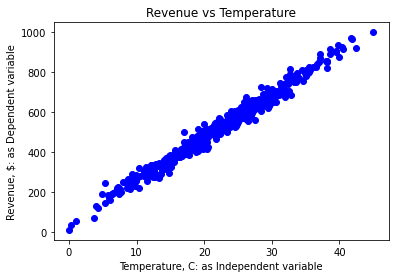

In [49]:
# the dataset visualization 
plt.scatter(df2.Temperature, df2.Revenue, color='blue')
plt.title('Revenue vs Temperature')
plt.xlabel('Temperature, C: as Independent variable')
plt.ylabel('Revenue, $: as Dependent variable')
plt.show()

The above step is required to make sure that there is a linear relationship between variables, as per the requirement of the first assumption of the Linear Regression model.
___

In [43]:
# assigning dependent variable
y2 = df2['Revenue']

# assigning independent variable
x2 = df2[['Temperature']]

# adding constant to independent variable
x2 = sm.add_constant(x2)

# fitting linear regression model
model2 = sm.OLS(y2, x2).fit()

# view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1747.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):          5.61e-165
Time:                        16:20:52   Log-Likelihood:                -2845.7
No. Observations:                 500   AIC:                             5695.
Df Residuals:                     498   BIC:                             5704.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         133.0486      9.397     14.158      

___
From the above output, we can see that the fitted regression equation is: **Revenue = 133.0486 + 16.6041*(Temperature)**, while it was **Revenue = 44.8313 + 21.4436*(Temperature)** as per the first model.

According to the second model, each additional increase of the 'Temperature' causes an average increase in the 'Revenue' of 16.6041 currency unit. And the intercept value of 133.0486 indicates the average expected 'Revenue' if the 'Temperature' is 0 degree C.


                                                        ***
                                                     
Interpretation of the rest of the model summary:

- **P>|t|** - as per the above summary, the p-value for the 'Temperature' is 0.000, and it's less than .05 (5%), so we can conclude that there is a statistically significant association between the 'Temperature' and the 'Revenue'.

- **R-squared** - R-squared is 77.8%, and it means that the variation in the 'Revenue' can be explained by the 'Temperature' increase/decrease for 77.8%. According to the first model, this figure is higher (98%).

- **F-statistic & p-value** - The F-statistic (1747) and the corresponding p-value (5.61e-165). Since the p-value in this example is greater than .05 (5%), it means that our model is not a statistically significant and the 'Temperature' is not believed to be valuable to predict the variation in the 'Revenue'. According to the first model, this value was statistically significant. 
___

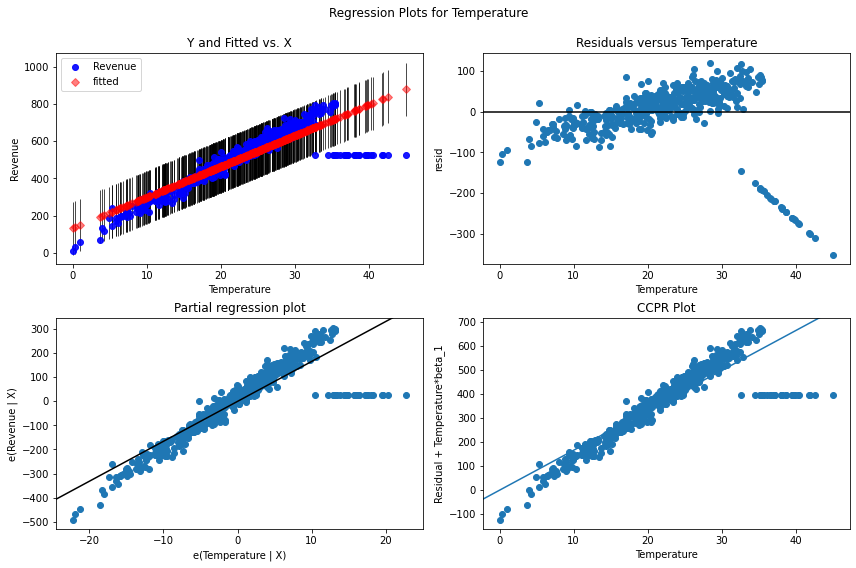

In [46]:
# residual vs. fitted values plot

fig2 = plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_regress_exog(model2, 'Temperature', fig=fig2)

As per the above plot, we can conclude that heteroscedasticity is present, as the residuals appear not to be randomly distributed throughout the chart around the value zero.
___

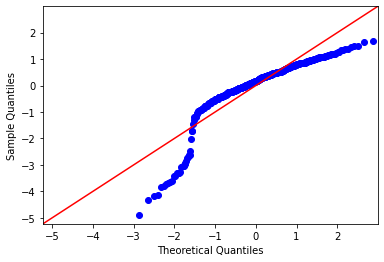

In [52]:
# Q-Q plot to test Normality of the distribution

# assign residuals
residuals2 = model2.resid

#create Q-Q plot
fig = sm.qqplot(residuals2, fit=True, line="45")
plt.show()

Since the data values in the above Q-Q plot don't fall along a nearly direct line at a 45-degree angle, we can conclude that the data is not normally distributed.
___

### Performing Simple Linear Regression - option #03
*Remove outliers in order to check if it will significantly impact the analysis.*

In [53]:
# creating copy of the dataset for the third model/option
df3 = df.copy()

In [54]:
# identifying outliers by interquartile range
Q1 = df3.quantile(q=.25)
Q3 = df3.quantile(q=.75)
IQR = df3.apply(stats.iqr)
IQR

Temperature     10.618417
Revenue        236.699240
dtype: float64

In [62]:
# keeping observations/rows in the dataset (that have values within 1.5*IQR of Q1 and Q3)
df3_clean = df3[~((df3 < (Q1-1.5*IQR)) | (df3 > (Q3+1.5*IQR))).any(axis=1)]
df3_clean.shape # checking how many observations/rows are left in the dataset

(496, 2)

There are 496 observations/rows and 2 variables/columns in the dataset. It was (500, 2) initially, so the code removed four observations/rows with outliers.
___

In [61]:
# summary statistics for the updated dataset
df3_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,496.0,22.318284,7.882934,3.664670,17.196809,22.423006,27.740674,42.51528
Revenue,496.0,523.563410,170.581945,71.160153,406.365858,530.552469,642.257922,969.29163


By comparing the above summary statistics with the previous version, we can see that minimum temperature level was increased from 0 degree C to 3.66 degree C and revenue increased accordingly.
___

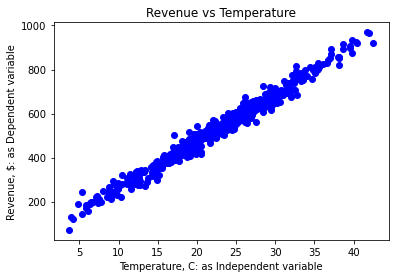

In [63]:
# the dataset visualization 
plt.scatter(df3_clean.Temperature, df3_clean.Revenue, color='blue')
plt.title('Revenue vs Temperature')
plt.xlabel('Temperature, C: as Independent variable')
plt.ylabel('Revenue, $: as Dependent variable')
plt.show()

The above step is required to make sure that there is a linear relationship between the variables, as per the requirement of the first assumption of the Linear Regression model. As we can see, the removal of the outliers did not impact the linear relationship between the variables. The assumption is met.
___

In [64]:
# assigning dependent variable
y3 = df3_clean['Revenue']

# assigning independent variable
x3 = df3_clean[['Temperature']]

# adding constant to independent variable
x3 = sm.add_constant(x3)

# fitting linear regression model
model3 = sm.OLS(y3, x3).fit()

# view model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 2.248e+04
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:08:09   Log-Likelihood:                -2300.2
No. Observations:                 496   AIC:                             4604.
Df Residuals:                     494   BIC:                             4613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          45.8304      3.379     13.563      

As we can see from the above summary, its results are very close to the first model and inticate that the model is a statistically significant as well. 
___

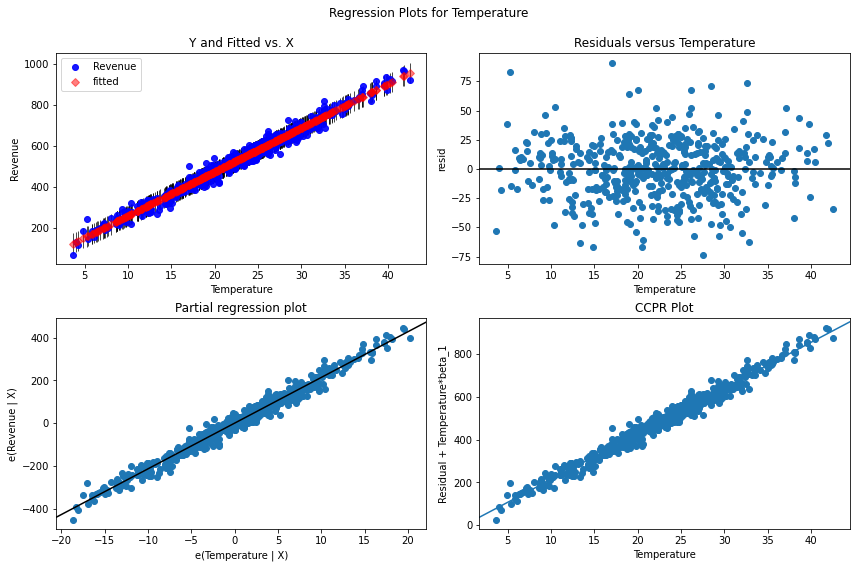

In [65]:
# residual vs. fitted values plot

fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(model3, 'Temperature', fig=fig3)

The above plots are very similar to the plots of the first model. The residuals of the plot in the top right corner seem randomly scattered around zero, and this is an indication that heteroscedasticity is not present.
___

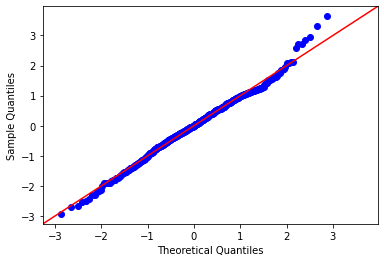

In [66]:
# Q-Q plot to test Normality of the distribution

# assign residuals
residuals3 = model3.resid

#create Q-Q plot
fig = sm.qqplot(residuals3, fit=True, line="45")
plt.show()

Again, the Q-Q plot of the third model is very similar to the first model since the data values in the above Q-Q plot fall along a nearly direct line at a 45-degree angle, so the data is not normally distributed.
___

## Summary

This analysis has been performed purely for the display purposes of the Simple Linear Regression model, as it's useful to have some notes on the steps. However, during the analysis I faced with outliers and decided to run the analysis in a couple of different scenarios depending on various manipulations on the outliers as they can have significant impact on the analysis. So, the first run of the model has been implemented as it is without any changes in the outliers as we cannot reach out SME on the dataset and clarify if those observations abnormally far away from other values are actually outliers or not. The first model has R-squared close to 100%, meaning that the dependent variable can be explained by the independent one for 98%, which indicates a highly reliable model. Furthermore, all the required assumptions are met. 

The second model was run after replacing all outliers to median value of the dataset, but it produced a statistically insignificant outputs with two failed assumptions out of three, meaning that the results of the second model cannot be reliable. 

The third model was run after removing the observations/rows with outliers and its results are close to the first model with statistically significant outputs and all required assumptions are met. 

So, having demonstrated the above analysis in three different scenarios, I can conclude that outliers can significantly impact the model.  